#Import Libraries

In [0]:
from random import random
from random import uniform
from random import randrange
from math import exp
from time import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LightSource

In [0]:
phone = np.array([2,3,4,3,7,1,7])
print(phone)

[2 3 4 3 7 1 7]


In [0]:
next_number  = np.random.randint(low=0,high=9,size=7)
print(next_number)

[3 8 5 8 1 8 6]


In [0]:
print(phone == next_number)
print(np.prod(phone == next_number))

[False False False False False False False]
0


In [0]:
for i in range(100000000):
    next_number  = np.random.randint(low=0,high=9,size=phone.shape[0])
    if np.prod(phone == next_number) == 1:
        print('Number Found')
        print(i, 'Call Number')
        break

Number Found
1873093 Call Number


In [0]:
noise = np.random.randn(1,2)

In [0]:
x = np.array([0])

for i in range(1000):
    print(x)
    x = x + np.random.randn(1)
    if np.abs(x) < 0.005:
        print(x, i, 'home')
        break

In [0]:
x = np.array([0,0])

for i in range(100):
    # print(x)
    x = x + np.random.randn(1,2)
    d  = np.abs(x-np.array([0,0]))
    pyth = np.sqrt(d[0,0]**2 + d[0,1]**2)
    if np.abs(pyth) < .5:
        print(x, i, 'home')
        break

In [0]:
def f(x):
    return x[0]**2 + x[1]**2 #Simple function to optimize: De Jong Sphere Sum of Xi**2 for all i 

In [0]:
f([0,0])

0

In [0]:
cost = np.zeros((20,20))

In [0]:
f([0,0])

0

In [0]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

In [12]:
x.shape

(100,)

In [0]:
cost = np.zeros((100,100))

In [0]:
# x, y = np.meshgrid(x, y) #make copies of each 

#same as double for loop below
for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        cost[i,j] = f([x[i], y[j]])
        


In [0]:
z = f([x,y]) #cost function

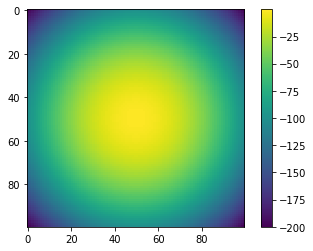

In [16]:
plt.imshow(cost)
plt.colorbar()

#Surface Plot

In [0]:
def surf(x,y,z):
    
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
    fig.set_size_inches(10, 10)

    ls = LightSource(270, 45)

    rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')

    surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                   linewidth=0, antialiased=False, shade=False)

    plt.show() 

In [0]:
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)

In [0]:
x, y = np.meshgrid(x, y)

In [0]:
z = f([x,y])

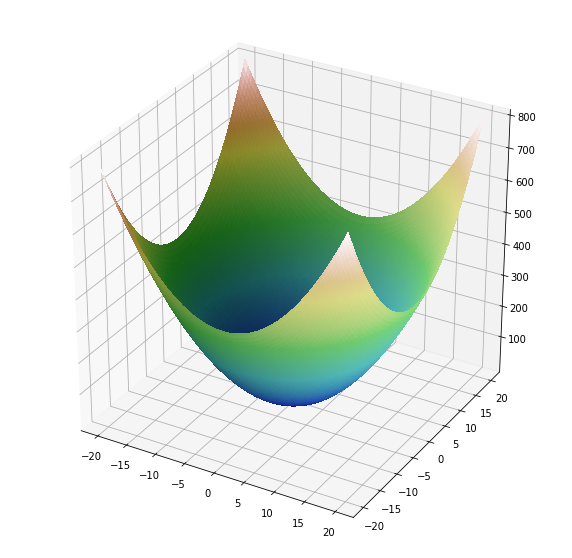

In [0]:
surf(x,y,z) #dejons sphere

In [0]:
z.shape

(100, 100)

In [0]:
np.argmin(z)

4949

In [0]:
ind = np.unravel_index(np.argmin(z, axis=None), z.shape) # unravel index will loop through matrix in flattened list 

In [0]:
ind

(49, 49)

In [0]:
x[0][49]

-0.20202020202020066

In [0]:
x[1][49]

-0.20202020202020066

#Simulated Annealing

In [0]:
boltzman = 1.3806488e-23 #https://en.wikipedia.org/wiki/Boltzmann_constant

In [0]:
def noise():
    return np.random.normal(0,1,(2,))

In [0]:
def SA(f, x):
    
    a  = 0.01 #cooling rate 
    t0 = 100
    t  = t0 #temperature
    
    for i in range(1000): #iteration times

        for j in range(100): #how much to loop before cooling
            
            xi = x + noise() #take position at random change to get new postion
            
            delta = f(x) - f(xi) #difference between where you were and where you're going, new space better results in negative number
            
            if(delta <= 0.0 or (exp(-delta / boltzman * t) > random())):
                
                x = xi
        
        t = t - a

    return x

In [0]:
def f(x):
    return -(x[0]**2) - (x[1]**2)

In [0]:
p = ((5.0,10.0))

In [10]:
print(SA(f, p))

[2.16640494e-05 2.23936994e-03]


In [0]:
def f(x):
    return x[0]**2 + x[1]**2

In [0]:
def SA(s):
    
    t = 0.5
    a = 0.001

    for i in range(1000):

        for j in range(100):
            
            si = s + r()
            
            delta = f(s) - f(si)

            if(delta > 0 or t > random()):
                    
                s = si
        
        t = t - a

    return s

In [0]:
s = ((5.0,10.0))

In [0]:
print(SA(s))

NameError: ignored

#TSP

In [0]:
from scipy.special import factorial

In [0]:
n = 60

In [48]:
factorial(n)

8.32098711274139e+81

In [0]:
cities = 100*np.random.random((n,2)) # x y coords for city, mult by 100 for scale (like 100 miles)

In [0]:
cities[n-1] = cities[0] # make the last city the first city as to say we came back home

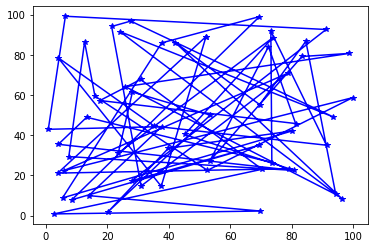

In [51]:
plt.plot(cities[:,0], cities[:,1], '*b-')

In [0]:
tour = np.random.permutation(n) # random order of the numbers up to 60 (order of which city to go to)

In [0]:
def swap(tour):
    tour = tour.copy()
    
    i = np.random.randint(n)
    j = np.random.randint(n)

    tour[[i,j],] = tour[[j,i],] # ???
    
    return tour

In [54]:
tour

array([43, 40, 23, 17, 22, 30, 14, 10, 35, 29,  9, 44, 19, 41, 21,  8, 13,
        1, 42, 20, 18,  7, 32, 52, 47, 46, 49,  0, 48, 51, 38, 33,  2, 25,
       54, 31, 55,  3, 12, 24, 58, 45, 28, 37,  4, 16, 39, 57, 50, 27, 56,
        6, 59, 36, 26, 34,  5, 53, 11, 15])

In [0]:
new = swap(tour)

In [56]:
cities[new]

array([[27.91923167, 17.31661683],
       [ 0.7991273 , 42.9082823 ],
       [42.17708538, 85.98207371],
       [31.01667175, 14.70081436],
       [96.45902515,  8.28980216],
       [53.45682642, 27.3706204 ],
       [99.86268215, 58.64394394],
       [ 7.47997811, 29.33431821],
       [70.37907278, 23.03058515],
       [ 4.06822352, 35.44948972],
       [80.60997788, 22.46037401],
       [69.4549112 , 35.01360462],
       [27.62761315, 96.72961519],
       [ 6.364367  , 99.13751774],
       [24.129724  , 91.50980579],
       [83.37888807, 79.11808686],
       [52.61036915, 22.49830164],
       [37.55454656, 14.5635856 ],
       [91.22225561, 92.55063088],
       [93.53472386, 49.06365481],
       [21.41099248, 94.04170188],
       [13.29451475, 48.90284691],
       [81.30201549, 45.7721188 ],
       [53.50388702, 49.95793268],
       [37.70193484, 85.8886053 ],
       [69.53018146, 98.9482192 ],
       [80.12071447, 42.07488217],
       [52.13618792, 89.01549904],
       [ 5.43454715,

In [57]:
cities

array([[52.13618792, 89.01549904],
       [37.55454656, 14.5635856 ],
       [ 3.93165926, 78.60523246],
       [35.30487261, 44.46618286],
       [91.35386469, 34.99072591],
       [73.23846565, 91.68002124],
       [73.56006508, 26.37328682],
       [13.29451475, 48.90284691],
       [ 4.06822352, 35.44948972],
       [80.60997788, 22.46037401],
       [ 7.47997811, 29.33431821],
       [12.61234481, 86.38222637],
       [15.99241851, 59.40860294],
       [52.61036915, 22.49830164],
       [99.86268215, 58.64394394],
       [ 5.83149734, 22.34244055],
       [78.68554785, 70.73294385],
       [31.01667175, 14.70081436],
       [21.41099248, 94.04170188],
       [27.62761315, 96.72961519],
       [93.53472386, 49.06365481],
       [24.129724  , 91.50980579],
       [96.45902515,  8.28980216],
       [42.17708538, 85.98207371],
       [69.58185087, 55.20398441],
       [84.63144423, 86.69046749],
       [94.37300782, 10.50300899],
       [25.87885748, 64.11338725],
       [98.77278084,

In [0]:
def travel_cost(cities):

    total_distance = 0 

    for i in range(cities.shape[0]-1):

        distance = np.sqrt( (cities[i,0] - cities[i+1,0])**2  +  (cities[i,1] - cities[i+1,1])**2 )

        total_distance += distance

    return total_distance

In [59]:
travel_cost(cities)

3609.741284177468

In [0]:
tour = np.random.permutation(n) #A tour is a list of the cities in the order of travel

In [61]:
travel_cost(cities[tour])

3301.6156388099184

In [0]:
t = np.linspace(0,1,10000)
cooling_schedule = np.exp(-5*t)

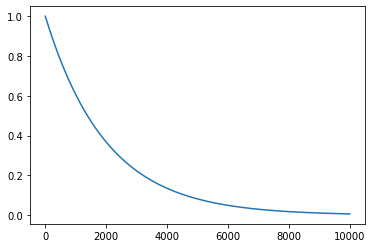

In [63]:
plt.plot(cooling_schedule)

In [0]:
for T in cooling_schedule:

    tour2 = swap(tour)

    delta =  travel_cost(cities[tour]) - travel_cost(cities[tour2]) 

    if delta > 0 or  np.exp( delta / T) > np.random.random(): # if better, accept solution, if worse 

        tour = tour2

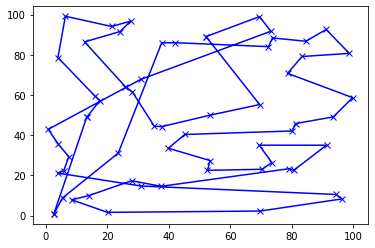

In [65]:
plt.plot(cities[tour][:,0],cities[tour][:,1], 'xb-')
plt.plot(cities[tour][[n-1,0],0],cities[tour][[n-1,0],1], 'xb-')

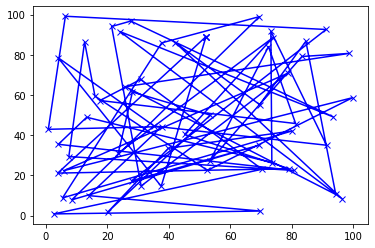

In [66]:
plt.plot(cities[:,0],cities[:,1], 'xb-')
plt.plot(cities[[n-1,0],0],cities[[n-1,0],1], 'xb-')

### 3d version

In [0]:
n = 60 #Make n Sample Cities

In [0]:
cities = 100*np.random.random((n,3)) #lat/long

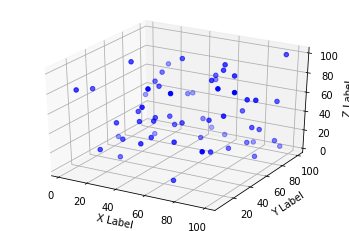

In [74]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = cities[:,0] 
y = cities[:,1] 
z = cities[:,2] 

ax.scatter(x, y, z, c='b', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [0]:
def plot3D(data):
    x = data[:,0] 
    y = data[:,1] 
    z = data[:,2]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d') 
    ax.scatter(x, y, z, c='b', marker='o')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    ax.plot(x,y,z, color='r')

    plt.show()

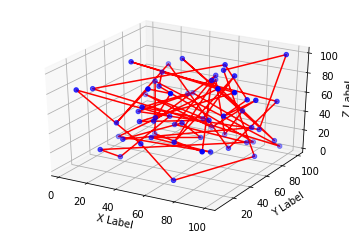

In [76]:
plot3D(cities)

In [0]:
cities[n-1] = cities[0]

In [0]:
def swap(tour):

    tour = tour.copy()

    i = np.random.randint(n)
    j = np.random.randint(n)

    tour[[i,j],] = tour[[j,i],]

    return tour

In [0]:
def travel_cost(cities):

    total_distance = 0 

    for i in range(cities.shape[0]-1):

        distance = np.sqrt( (cities[i,0] - cities[i+1,0])**2  +  (cities[i,1] - cities[i+1,1])**2 +  (cities[i,2] - cities[i+1,2])**2 )

        total_distance += distance

    return total_distance

In [0]:
t = np.linspace(0,1,10000)
cooling_schedule = np.exp(-5*t)

In [0]:
for T in cooling_schedule:

    tour2 = swap(tour)

    delta =  travel_cost(cities[tour]) - travel_cost(cities[tour2]) 

    if delta > 0 or  np.exp( delta / T) > np.random.random():

        tour = tour2

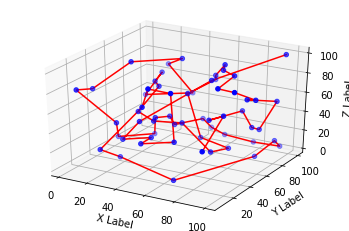

In [89]:
plot3D(cities[tour])

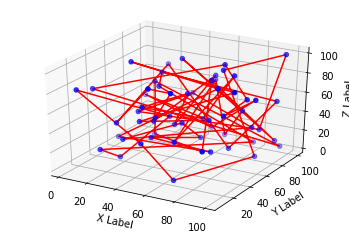

In [90]:
plot3D(cities)